# **Analisa Clustering Menggunakan K-Means**
---

> ##  Data Mining
Data mining adalah suatu proses pengumpulan informasi dan data yang penting 
dalam jumlah yang besar atau big data. Dalam proses ini seringkali memanfaatkan beberapa metode, seperti matematika, statistika dan pemanfaatan teknologi artificial intelligence (AI). Pengertian data mining ini juga dikenal dengan istilah lain, seperti Knowledge Discovery in Databases (KDD) dan Data Analysis.
Selain itu juga ada knowledge extraction, business intelligence, data dredging, information harvesting, data archeology dan lainnya. Proses penambangan data terdiri dari beberapa tahapan dan teknik, dari adanya data cleansing (pembersihan data), integrasi data, seleksi data dan data transformation hingga evaluasi pola dalam mendapatkan informasi dari data itu. (sumber : https://www.sampoernauniversity.ac.id/id/data-mining/)

> ##  Twitter
Menurut pengertian Wikipedia, Twitter adalah layanan jejaring sosial atau bisa juga dibilang mikroblog daring yang memungkinkan pengguna untuk mengirim, membaca, dan membalas pesan teks hingga 280 karakter (dikenal dengan sebutan kicauan (tweet)). Pada awalnya Twitter hanya mengizinkan pengguna untuk mengirim tweet maksimal 140 karakter, namun pada tanggal 7 November 2017 twitter menambah jumlahnya menjadi 280 karakter.
Di Twitter, pengguna yang tidak terdaftar hanya dapat membaca kicauan (tweet) pengguna lain, sedangkan pengguna terdaftar bisa menulis, membagikan, dan menyukai kicauan (tweet) melalui user interface situs web dan aplikasi smartphone Android dan iOS (iPhone). Kicauan (tweet) diartikan ketika pengguna menulis dan membagikan tulisan (postingan). Sedangkan retweet diartikan membagikan tulisan pengguna lain ke beranda profil kita.
Twitter memiliki banyak manfaat dalam segala aspek, namun ada beberapa hal yang terkadang membuat kegaduhan sehingga terjadi masalah dimana-mana. Twitter banyak dimanfaatkan sebagai media kampanye politik dengan mendukung pasangan tertentu atau bahkan merendahkan pasangan lain, dijadikan sebagai sarana protes, sarana pembelajaran, hingga media komunikasi darurat. (sumber : https://dianisa.com/pengertian-twitter/)

## **Proses Melakukan Crawling Data**
> ##  Crawling Data
Data Crawling merupakan proses pengumpulan data sekunder yang mampu memilah informasi secara cepat dan otomatis tanpa ada reduplikasi data. Proses ini memiliki kaitan dengan data scraping. Begitu semua data telah terkumpul melalui crawling, data scraping akan mengeksekusinya. (sumber : https://algorit.ma/blog/data-science/data-crawling-2022/)

Pada kali ini, saya melakukan crawling data twitter dengan kata kunci yaitu "BBM naik". Di bawah ini merupakan proses crawling data twitter.

Tahap Pertama, menginstall modul yang diperlukan untuk melakukan Crawling Data, disini saya menggunakan library Twint untuk melakukan Crawling Data twitter.

Twint adalah sebuah tools yang digunakan untuk melakukan scrapping dari aplikasi twitter yang disetting secara khusus menggunakan bahasa pemrograman Python. Twint dapat kita gunakan dan jalankan tanpa harus menggunakan API dari Twitter itu sendiri, dengan kapasitas scrapping data maksimalnya adalah 3200 tweet.

Bukan hanya digunakan pada tweet, twint juga bisa kita gunakan untuk melakukan scrapping pada user, followers, retweet dan sebagainya. Twint memanfaatkan operator pencarian twitter untuk memungkinkan proses penghapusan tweet dari user tertentu, memilih dan memilah informasi-informasi yang sensitif, termasuk email dan nomor telepon di dalamnya. (sumber : https://www.kakakiky.id/2021/09/materi-lengkap-tentang-twint.html)

In [ ]:
%%capture
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

In [ ]:
%%capture
!pip install nest-asyncio

In [ ]:
%%capture
!pip install aiohttp==3.7.0

In [ ]:
import nest_asyncio
nest_asyncio.apply() # Mengimport Library Nest Asyncio Apabila dijalankan pada jupyter notebook
import twint # Mengimport Library Twint
c = twint.Config()
c.Search = 'Tragedi Kanjuruhan'
c.Pandas = True
c.Limit = 60
twint.run.Search(c)

1579988132400807937 2022-10-12 00:11:40 +0000 <Murai182> @DivHumas_Polri Suruh nyoba sendiri aja, kondisikan sama seperti kondisi Aremania saat tragedi Kanjuruhan
1579987422431305728 2022-10-12 00:08:50 +0000 <sahalaharianj16> Sampai saat ini tragedi kanjuruhan blm ada yg mengaku paling bertanggung jawab dlm peristiwa tsb, mungkin yg paling pantas dipersalahkan, BOLA, dan bola
1579987369859510272 2022-10-12 00:08:38 +0000 <ovrthnkrbelle_> "Duka kehilangan itu nggak akan pernah sembuh, jun. Kita cuma bisa menerima dan terus menerima kalau ia tidak akan pernah kembali"   Sekian dari banyak tutur abang kami sejak kejadian Semeru sampai tragedi Kanjuruhan. Dan memang benar, duka kehilangan itu akan terus melekat.
1579987355355607040 2022-10-12 00:08:34 +0000 <KartumerahNews> Mahfud MD Bicara Gas Air Mata Kedaluarsa Tragedi Kanjuruhan, Pengamat Cium Indikasi Korupsi  https://t.co/pelC79zL1a
1579987252834603008 2022-10-12 00:08:10 +0000 <detik_jatim> Kematian Helen yang Menambah Duka Tragedi

In [ ]:
Tweets_dfs = twint.storage.panda.Tweets_df
Tweets_dfs["tweet"]

0     @DivHumas_Polri Suruh nyoba sendiri aja, kondi...
1     Sampai saat ini tragedi kanjuruhan blm ada yg ...
2     "Duka kehilangan itu nggak akan pernah sembuh,...
3     Mahfud MD Bicara Gas Air Mata Kedaluarsa Trage...
4     Kematian Helen yang Menambah Duka Tragedi Kanj...
5     Lusa Kirim Laporan Tragedi Kanjuruhan ke Presi...
6     Polresta Malang Kota Sambangi Korban Tragedi K...
7     Machfud MD Sebut TGIPF akan Serahkan Hasil Inv...
8     @detikcom Di luar tragedi Kanjuruhan, saya ras...
9     Sejumlah Polisi Malang Sujud Massal Mohon Maaf...
10    Gas air mata kedaluarsa dalam tragedi Kanjuruh...
11     https://t.co/9KrwxhyDJT  Ade Armando dipolisi...
12    Ade Armando dipolisikan lantaran menyebut Arem...
13    Ini Sosok Pengganti dan Harta Kekayaannya Kapo...
14    Dua Tersangka Tragedi Kanjuruhan Ketua Panpel ...
15    Gas Air Mata Sebab Tragedi Kanjuruhan, Said Di...
16    Ade Armando dipolisikan terkait Tragedi Kanjur...
17    11 HARI DALAM PERAWATAN. sebuah catatan bu

In [ ]:
Tweets_dfs["tweet"].to_csv("TragediKanjuruhan.csv")

## **Proses Text Preprocessing**
Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi
*   Case Folding
*   Tokenizing
*   Stopwords
*   Filtering
*   Stemming



### **Case Folding**
Case Folding adalah untuk menyamaratakan penggunaan huruf kapital. Misalnya data teks yang kita dapat berupa tulisan "DaTA SCIence" maka dengan case folding artinya kita mengubah semua huruf menjadi huruf kecil (lowercase) semua.

> #### Library yang digunakan
**Library NumPy (Numerical Python)** 
adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python. Keunggulan NumPy array dibandingkan dengan list pada Python adalah konsumsi memory yang lebih kecil serta runtime yang lebih cepat. NumPy juga memudahkan kita pada Aljabar Linear, terutama operasi pada Vector (1-d array) dan Matrix (2-d array). <br>
**Library Pandas (Python for Data Analysis)** 
adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif. Dalam pandas terdapat dua objek yang akan dibahas pada tutorial ini, yaitu DataFrame dan Series. DataFrame adalah objek yang memiliki struktur data tabular, berorientasi pada kolom dengan label baris dan kolom. Sedangkan Series adalah objek array 1-dimensi yang memiliki label.
(sumber : https://medium.com/@yasirabd/pengenalan-numpy-pandas-matplotlib-b90bafd36c0)

In [ ]:
#Menginstall Library yang diperlukan
%%capture
!pip install numpy #Library untuk Proses Case Folding
!pip install pandas #Library untuk Proses Case Folding

Menampilkan hasil crawling data twitter yang telah diberi label

In [ ]:
#Mengimport library yang telah di install
import numpy as np
import pandas as pd

#Membaca file .csv
data_twitter = pd.read_csv("TragediKanjuruhan.csv")

#Menampilkan data pada file .csv
data_twitter

,Unnamed: 0,tweet
0,0,"@DivHumas_Polri Suruh nyoba sendiri aja, kondi..."
1,1,Sampai saat ini tragedi kanjuruhan blm ada yg ...
2,2,"""Duka kehilangan itu nggak akan pernah sembuh,..."
3,3,Mahfud MD Bicara Gas Air Mata Kedaluarsa Trage...
4,4,Kematian Helen yang Menambah Duka Tragedi Kanj...
5,5,Lusa Kirim Laporan Tragedi Kanjuruhan ke Presi...
6,6,Polresta Malang Kota Sambangi Korban Tragedi K...
7,7,Machfud MD Sebut TGIPF akan Serahkan Hasil Inv...
8,8,"@detikcom Di luar tragedi Kanjuruhan, saya ras..."
9,9,Sejumlah Polisi Malang Sujud Massal Mohon Maaf...


Proses melakukan case Folding

In [ ]:
#Case Folding untuk membuat huruf menjadi kecil (lowercase)
data_twitter['tweet'] = data_twitter['tweet'].str.lower()

#Menampilkan Hasil Case Folding pada kolom tweet
data_twitter['tweet']

0     @divhumas_polri suruh nyoba sendiri aja, kondi...
1     sampai saat ini tragedi kanjuruhan blm ada yg ...
2     "duka kehilangan itu nggak akan pernah sembuh,...
3     mahfud md bicara gas air mata kedaluarsa trage...
4     kematian helen yang menambah duka tragedi kanj...
5     lusa kirim laporan tragedi kanjuruhan ke presi...
6     polresta malang kota sambangi korban tragedi k...
7     machfud md sebut tgipf akan serahkan hasil inv...
8     @detikcom di luar tragedi kanjuruhan, saya ras...
9     sejumlah polisi malang sujud massal mohon maaf...
10    gas air mata kedaluarsa dalam tragedi kanjuruh...
11     https://t.co/9krwxhydjt  ade armando dipolisi...
12    ade armando dipolisikan lantaran menyebut arem...
13    ini sosok pengganti dan harta kekayaannya kapo...
14    dua tersangka tragedi kanjuruhan ketua panpel ...
15    gas air mata sebab tragedi kanjuruhan, said di...
16    ade armando dipolisikan terkait tragedi kanjur...
17    11 hari dalam perawatan. sebuah catatan bu

### **Tokenizing**
Tokenizing merupakan tahap yang digunakan untuk melakukan pemecahan perkata pada fungsi word_tokenize() melalui Library NLTK. Selain itu pada tahap ini juga melakukan:

Pada fungsi remove_char_special(text), untuk menghapus karakter berupa tab, karakter non ASCII, mention, link, hastagh, dan URL yang tidak lengkap.
1.   Menghapus Karakter Spesial <br>
Pada fungsi remove_PTA_special(text), untuk menghapus karakter berupa tab, karakter non ASCII, mention, link, hastagh, dan URL yang tidak lengkap.
2.   Menghapus Angka <br>
Pada fungsi remove_number(text), untuk menghapus karakter berupa angka.
3.   Menghapus Punctuation (Tanda Baca) <br>
Menggunaan fungsi removepunctuation() untuk mengganti sting.punctuation berupa (!"#$%&\’()*+,-./:;<=>?@[\]^`{|}~) dengan "".
4.   Menghapus Ruang Kosong <br>
Pada fungsi remove_whitespace_LT() dan fungsi remove_whitespace_multiple()
5.   Menghapus Karakter Single <br>
Menggunakan fungsi remove_singl_char



> #### Library yang digunakan
**Natural Language Toolkit atau disingkat NLTK**, adalah libray python untuk bekerja dengan permodelan teks. NLTK menyediakan alat yang baik mempersiapkan teks sebelum digunakan pada machine learning atau algoritma deep learning. Cara termudah untuk menginstall NLTK adalah menggunakan “pip” pada command line/terminal. (sumber : https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe)

In [ ]:
#Menginstall library NLTK
%%capture
!pip install nltk #Library untuk Proses Tokenizing

In [ ]:
#Mengimport library NLTK yang telah di install
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
# ------ Tokenizing ---------

def remove_char_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data_twitter['tweet'] = data_twitter['tweet'].apply(remove_char_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data_twitter['tweet'] = data_twitter['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_twitter['tweet'] = data_twitter['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data_twitter['tweet'] = data_twitter['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data_twitter['tweet'] = data_twitter['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data_twitter['tweet'] = data_twitter['tweet'].apply(remove_singl_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_twitter['tweet'] = data_twitter['tweet'].apply(word_tokenize_wrapper)
data_twitter['tweet']

0     [polri, suruh, nyoba, sendiri, aja, kondisikan...
1     [sampai, saat, ini, tragedi, kanjuruhan, blm, ...
2     [duka, kehilangan, itu, nggak, akan, pernah, s...
3     [mahfud, md, bicara, gas, air, mata, kedaluars...
4     [kematian, helen, yang, menambah, duka, traged...
5     [lusa, kirim, laporan, tragedi, kanjuruhan, ke...
6     [polresta, malang, kota, sambangi, korban, tra...
7     [machfud, md, sebut, tgipf, akan, serahkan, ha...
8     [di, luar, tragedi, kanjuruhan, saya, rasa, ka...
9     [sejumlah, polisi, malang, sujud, massal, moho...
10    [gas, air, mata, kedaluarsa, dalam, tragedi, k...
11    [ade, armando, dipolisikan, lantaran, menyebut...
12    [ade, armando, dipolisikan, lantaran, menyebut...
13    [ini, sosok, pengganti, dan, harta, kekayaanny...
14    [dua, tersangka, tragedi, kanjuruhan, ketua, p...
15    [gas, air, mata, sebab, tragedi, kanjuruhan, s...
16    [ade, armando, dipolisikan, terkait, tragedi, ...
17    [hari, dalam, perawatan, sebuah, catatan, 

### **Stopwords**
Stopword bertujuan untuk menghapus kata-kata yang tidak penting pada tokens atau kata yang dihasilkan oleh proses sebelumnya. Kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna disebut Stopword. Contohnya seperti 
- 'yang', 
- 'dari', 
- 'dan', 
- 'lalu',
- 'merupakan', dan masih banyak lagi.

> #### Library yang digunakan
**Python Sastrawi** adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”.



In [ ]:
#Menginstall Library yang diperlukan
%%capture
!pip install Sastrawi #Library untuk Proses Stopwords
!pip install swifter #Library untuk Proses Stemming

In [ ]:
#Mengimport library yang telah diinstall
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
list_stopwords = stopwords.words('indonesian')

#Menghapus Stopword dari list tokens
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_twitter['tweet'] = data_twitter['tweet'].apply(stopwords_removal)

data_twitter['tweet']

0     [polri, suruh, nyoba, aja, kondisikan, kondisi...
1     [tragedi, kanjuruhan, blm, yg, mengaku, bertan...
2     [duka, kehilangan, nggak, sembuh, jun, menerim...
3     [mahfud, md, bicara, gas, air, mata, kedaluars...
4     [kematian, helen, menambah, duka, tragedi, kan...
5     [lusa, kirim, laporan, tragedi, kanjuruhan, ke...
6     [polresta, malang, kota, sambangi, korban, tra...
7     [machfud, md, tgipf, serahkan, hasil, investig...
8     [tragedi, kanjuruhan, klub, mengedukasi, suppo...
9     [polisi, malang, sujud, massal, mohon, maaf, t...
10    [gas, air, mata, kedaluarsa, tragedi, kanjuruh...
11    [ade, armando, dipolisikan, lantaran, menyebut...
12    [ade, armando, dipolisikan, lantaran, menyebut...
13    [sosok, pengganti, harta, kekayaannya, kapolda...
14    [tersangka, tragedi, kanjuruhan, ketua, panpel...
15    [gas, air, mata, tragedi, kanjuruhan, said, di...
16    [ade, armando, dipolisikan, terkait, tragedi, ...
17    [perawatan, catatan, teman, teman, penyint

### **Stemming**
Stemming adalah tahapan yang juga diperlukan untuk menghilangkan sebuah imbuhan pada tokens atau kata yang dihasilkan pada proses sebelumnya. Contohnya seperti
- 'berjalan = jalan', 
- 'kesadaran = sadar', 
- 'berdiskusi = diskusi',
- 'berkarakter = karakter',
- 'mengatur = atur', dan masih banyak lagi.

> #### Library yang digunakan
**Swifter** adalah sebuah Paket yang secara efisien menerapkan fungsi apa pun ke kerangka data atau seri panda dengan cara tercepat yang tersedia

(sumber : https://pypi.org/project/swifter/)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_twitter['tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_twitter['tweet'] = data_twitter['tweet'].swifter.apply(get_stemmed_term)
data_twitter['tweet']

377
------------------------
polri : polri
suruh : suruh
nyoba : nyoba
aja : aja
kondisikan : kondisi
kondisi : kondisi
aremania : aremania
tragedi : tragedi
kanjuruhan : kanjuruhan
blm : blm
yg : yg
mengaku : aku
bertanggung : tanggung
dlm : dlm
peristiwa : peristiwa
tsb : tsb
dipersalahkan : salah
bola : bola
duka : duka
kehilangan : hilang
nggak : nggak
sembuh : sembuh
jun : jun
menerima : terima
sekian : sekian
abang : abang
kejadian : jadi
semeru : meru
melekat : lekat
mahfud : mahfud
md : md
bicara : bicara
gas : gas
air : air
mata : mata
kedaluarsa : kedaluarsa
pengamat : amat
cium : cium
indikasikorupsi : indikasikorupsi
kematian : mati
helen : helen
menambah : tambah
korban : korban
jiwa : jiwa
orang : orang
lusa : lusa
kirim : kirim
laporan : lapor
kepresiden : presiden
polresta : polresta
malang : malang
kota : kota
sambangi : sambang
alami : alami
iritasi : iritasi
machfud : machfud
tgipf : tgipf
serahkan : serah
hasil : hasil
investigasi : investigasi
presiden : presiden
j

Pandas Apply:   0%|          | 0/60 [00:00<?, ?it/s]

0     [polri, suruh, nyoba, aja, kondisi, kondisi, a...
1     [tragedi, kanjuruhan, blm, yg, aku, tanggung, ...
2     [duka, hilang, nggak, sembuh, jun, terima, ter...
3     [mahfud, md, bicara, gas, air, mata, kedaluars...
4     [mati, helen, tambah, duka, tragedi, kanjuruha...
5     [lusa, kirim, lapor, tragedi, kanjuruhan, pres...
6     [polresta, malang, kota, sambang, korban, trag...
7     [machfud, md, tgipf, serah, hasil, investigasi...
8     [tragedi, kanjuruhan, klub, edukasi, supporter...
9     [polisi, malang, sujud, massal, mohon, maaf, t...
10    [gas, air, mata, kedaluarsa, tragedi, kanjuruh...
11    [ade, armando, polisi, lantar, sebut, aremania...
12    [ade, armando, polisi, lantar, sebut, aremania...
13    [sosok, ganti, harta, kaya, kapolda, jawa, tim...
14    [sangka, tragedi, kanjuruhan, ketua, panpel, a...
15    [gas, air, mata, tragedi, kanjuruhan, said, di...
16    [ade, armando, polisi, kait, tragedi, kanjuruhan]
17    [awat, catat, teman, teman, sintas, traged

In [ ]:
#Menyimpan hasil dari Proses Text Preprocessing menjadi sebuah file .csv
data_twitter.to_csv('HasilTextPreprocessing.csv')

### **TF (Term Frequency)**
Merupakan Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

> #### Library yang digunakan
**Scikit-learn atau sklearn** merupakan sebuah module dari bahasa pemrograman 
Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari
module ini adalah untuk membantu melakukan processing data ataupun melakukan
training data untuk kebutuhan machine learnig atau data science. Banyak 
sekali fitur yang ada pada module ini seperti model-model klasifikasi, 
clustering, regresi, berbasis model machine learning dan proses-proses
yang dapat dimanfaatkan pada tahap Feature Engineering seperti reduksi dimensi
menggunakan PCA. Module ini sangatlah populer dan sering digunakan dikalangan
data scientist karena banyak sekali model-model machine learning yang dapat kita
panggil menggunakan module ini. (sumber : https://www.bisa.ai/course/detail/MzU3/1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('HasilTextPreprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre

,Unnamed: 0,Unnamed: 0.1,tweet
0,0,0,"['polri', 'suruh', 'nyoba', 'aja', 'kondisi', ..."
1,1,1,"['tragedi', 'kanjuruhan', 'blm', 'yg', 'aku', ..."
2,2,2,"['duka', 'hilang', 'nggak', 'sembuh', 'jun', '..."
3,3,3,"['mahfud', 'md', 'bicara', 'gas', 'air', 'mata..."
4,4,4,"['mati', 'helen', 'tambah', 'duka', 'tragedi',..."
5,5,5,"['lusa', 'kirim', 'lapor', 'tragedi', 'kanjuru..."
6,6,6,"['polresta', 'malang', 'kota', 'sambang', 'kor..."
7,7,7,"['machfud', 'md', 'tgipf', 'serah', 'hasil', '..."
8,8,8,"['tragedi', 'kanjuruhan', 'klub', 'edukasi', '..."
9,9,9,"['polisi', 'malang', 'sujud', 'massal', 'mohon..."


In [ ]:
print(vectorizer.vocabulary_)

{'polri': 260, 'suruh': 315, 'nyoba': 232, 'aja': 5, 'kondisi': 175, 'aremania': 23, 'tragedi': 336, 'kanjuruhan': 159, 'blm': 51, 'yg': 362, 'aku': 9, 'tanggung': 323, 'dlm': 78, 'peristiwa': 252, 'tsb': 339, 'salah': 277, 'bola': 53, 'duka': 80, 'hilang': 112, 'nggak': 227, 'sembuh': 291, 'jun': 153, 'terima': 327, 'sekian': 288, 'abang': 1, 'jadi': 135, 'meru': 218, 'lekat': 189, 'mahfud': 202, 'md': 214, 'bicara': 49, 'gas': 93, 'air': 4, 'mata': 211, 'kedaluarsa': 164, 'amat': 16, 'cium': 66, 'indikasikorupsi': 123, 'mati': 212, 'helen': 108, 'tambah': 320, 'korban': 177, 'jiwa': 148, 'orang': 237, 'lusa': 198, 'kirim': 169, 'lapor': 187, 'presiden': 261, 'polresta': 259, 'malang': 207, 'kota': 179, 'sambang': 278, 'alami': 10, 'iritasi': 128, 'machfud': 200, 'tgipf': 330, 'serah': 296, 'hasil': 106, 'investigasi': 127, 'jokowi': 151, 'jumat': 152, 'klub': 172, 'edukasi': 83, 'supporter': 313, 'peran': 249, 'maju': 203, 'kompetisi': 174, 'sepakbola': 294, 'indonesia': 124, 'sehat'

In [ ]:
matriks_vsm=bag.toarray()
#print(matrik_vsm)
matriks_vsm.shape

(60, 363)

In [ ]:
matriks_vsm[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
a=vectorizer.get_feature_names()

In [ ]:
print(len(matriks_vsm[:,1]))
dataTF =pd.DataFrame(data=matriks_vsm,index=list(range(1, len(matriks_vsm[:,1])+1, )),columns=[a])
dataTF

60


,aamiin,abang,ade,afinta,air,aja,ajak,akhmad,akibat,aku,...,video,voterna,vs,warga,warganet,waspada,widodo,wiyanto,ya,yg
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Proses Clustering menggunakan Metode K-Means**
Clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum (sumber : https://www.dqlab.id/belajar-clustering-dengan-kursus-data-scientist)

Metode yang digunakan untuk melakukan clustering yaitu metode K-Means. K-Means clustering adalah algoritma unsupervised learning yang dipakai untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan. (sumber : https://www.trivusi.web.id/2022/06/algoritma-kmeans-clustering.html)

### Reduksi dimensi menggunakan Metode Principal Component Analysis (PCA)
Reduksi dimensi dapat dijadikan sebagai salah satu langkah optimasi algoritma clustering. Proses reduksi dimensi yang umumnya diterapkan pada tahap pre-processing data bertujuan untuk mengurangi jumlah fitur (dimensi) tanpa menghilangkan informasi penting dari suatudata. Metode PCA akan membentuk sekumpulan dimensi baru yang kemudian di ranking berdasarkan varian datanya, sehingga tercipta kumpulan data dengan fitur yang lebih sederhana. (sumber : https://journal.unesa.ac.id/index.php/jieet/article/view/15170)

In [ ]:
from sklearn.decomposition import PCA
df_fcluster = dataTF
# df_fcluster
pca = PCA(n_components=2)
df_fcluster = pca.fit_transform(df_fcluster)
df_fclusters = pd.DataFrame(df_fcluster)
df_fclusters

,0,1
0,0.149380,-0.017063
1,-0.368087,1.112871
2,-0.144391,0.032303
3,-0.105431,0.190527
4,-0.572137,-0.703625
5,-0.116991,-0.000519
6,-0.367021,-0.434511
7,-0.151598,0.047797
8,-0.172812,-0.058508
9,0.154711,-0.237646


### Hasil Clustering
Berikut ini merupakan hasil clustering yang telah dilakukan proses reduksi dimensi sehingga menghasilkan clustering seperti di bawah ini. 

In [ ]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2)
kmeans=kmeans.fit(df_fclusters)
prediksi=kmeans.predict(df_fclusters)
centroids = kmeans.cluster_centers_

dfprediksi = pd.DataFrame(prediksi, columns=["Cluster"])
dfprediksi

,Cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


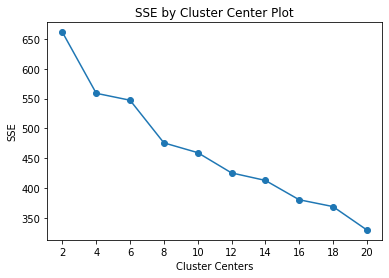

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(MY_DATA, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=100, batch_size=100, random_state=20).fit(MY_DATA).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(dataTF, 20)

# **Tugas Text Rank & Page Rank**
---

> ##  TextRank
TextRank adalah algoritma peringkat berbasis grafik untuk memproses teks. TextRank menghasilkan ekstraksi kalimat sebagai ringkasan. Salah satu kelebihan dari algoritma ini, tidak diperlukannya pelatihan menggunakan data training pada algoritma yang digunakan. (sumber : https://www.neliti.com/publications/237552/penerapan-algoritma-textrank-untuk-automatic-summarization-pada-dokumen-berbahas#:~:text=TextRank%20adalah%20algoritma%20peringkat%20berbasis,training%20pada%20algoritma%20yang%20digunakan.)

> ## PageRank
Algoritma PageRank atau algoritma Google diperkenalkan oleh Lary Page, salah satu pendiri Google. Ini pertama kali digunakan untuk menentukan peringkat halaman web di mesin pencari Google. Saat ini, semakin banyak digunakan di berbagai bidang, misalnya dalam peringkat pengguna di media sosial dll. Yang menarik dengan algoritma PageRank adalah bagaimana memulai dari masalah yang kompleks dan berakhir dengan solusi yang sangat sederhana. (sumber : https://towardsdatascience.com/pagerank-algorithm-fully-explained-dc794184b4af)

## **Dokumen Berita**
Untuk dokumen berita yang digunakan diambil dari website liputan 6 dengan link seperti berikut 
https://www.liputan6.com/news/read/5093558/ini-jadwal-sidang-ferdy-sambo-cs-terkait-kasus-kematian-brigadir-j

kemudian dijadikan file .pdf dengan nama DokumenBerita.pdf

### **Proses Parsing Dokumen Menjadi Beberapa Kalimat**
Pada tugas ini data awal berupa dokumen yang akan di parsing atau di pecah menjadi beberapa kalimat. 

### **Proses Ekstraksi Dokumen Menjadi Teks**
berikut ini merupakan library yang digunakan untuk mengekstrak dokumen format .pdf
> #### Library yang digunakan
**Library PyPDF2** 
adalah library PDF python murni gratis dan open-source yang mampu memisahkan, menggabungkan, memotong, dan mengubah halaman file PDF. Itu juga dapat menambahkan data khusus, opsi tampilan, dan kata sandi ke file PDF. PyPDF2 juga dapat mengambil teks dan metadata dari PDF. (sumber : https://pypi.org/project/PyPDF2/) <br>
**Library Doc2txt** 
adalah library Python yang fokus mengekstrak teks berkualitas tinggi yang dengan memperbaiki kesalahan sebanyak mungkin. doc2text juga secara drastis meningkatkan ekstraksi teks dari gambar dengan memperbaiki resolusi, area teks (pangkas), dan kemiringan.
(sumber : https://pypi.org/project/doc2text/)

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Membuka file .pdf

In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys
pdfFileObj = open('DokumenBerita.pdf', 'rb')

In [ ]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()

Hasil ekstraksi teks dari dokumen .pdf

In [ ]:
document

'Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs. Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.  \nHumas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap \npara tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda. Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).  \nDiketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 \nOktober 2022. Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) . \nMereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bharada Richard Elieze

## **Proses Parsing Teks Menjadi Kalimat**

> ### Library yang digunakan
**Library nltk.tokenize.punkt** 
Punkt Sentence Tokenizer adalah library python yang berfungsi membagi teks menjadi daftar kalimat dengan menggunakan algoritma yang tidak diawasi untuk membangun model untuk kata-kata singkatan, kolokasi, dan kata-kata yang memulai kalimat. Itu harus dilatih pada banyak koleksi plaintext dalam bahasa target sebelum dapat digunakan.(sumber : https://www.nltk.org/api/nltk.tokenize.punkt.html) <br>

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
def tokenize(document):
    # Kita memecahnya menggunakan  PunktSentenceTokenizer
    # 
    doc_tokenizer = PunktSentenceTokenizer()
    
    # metode tokenize() memanggil dokument kita
    # sebagai input dan menghasilkan daftar kalimat dalam dokumen
    
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

Hasil dari parsing teks menjadi beberapa kalimat

In [ ]:
sentences_list = tokenize(document)
for i in sentences_list:
    print('------        ------')
    print(i)

------        ------
Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . 
Liputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal 
persidangan untuk  Ferdy Sambo  Cs.
------        ------
Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.
------        ------
Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap 
para tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda.
------        ------
Baik 
kasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).
------        ------
Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas 
kematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 
Oktober 2022.
------        ------
Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan 
berencana dan  Obstruction of Justice  (OJ) .
------        ------
Merek

In [ ]:
print ("Banyaknya kalimat = ", (len(sentences_list)))
sentences_list

Banyaknya kalimat =  8


['Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs.',
 'Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.',
 'Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap \npara tersangka ini nantinya dilakukan dengan waktu yang berbeda -beda.',
 'Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).',
 'Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 \nOktober 2022.',
 'Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) .',
 'Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bhara

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
#Menghitung frekuensi kata dalam dokumen
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)
print(cv_matrix)

  (0, 44)	1
  (0, 46)	2
  (0, 102)	1
  (0, 39)	2
  (0, 99)	2
  (0, 27)	2
  (0, 105)	1
  (0, 50)	1
  (0, 53)	1
  (0, 21)	1
  (0, 60)	1
  (0, 26)	1
  (0, 47)	2
  (0, 82)	1
  (0, 71)	1
  (0, 101)	1
  (0, 87)	1
  (0, 48)	1
  (0, 103)	1
  (0, 65)	1
  (0, 85)	1
  (0, 109)	1
  (1, 44)	1
  (1, 102)	1
  (1, 105)	1
  :	:
  (7, 59)	1
  (7, 11)	1
  (7, 66)	1
  (7, 40)	1
  (7, 84)	1
  (7, 98)	1
  (7, 20)	1
  (7, 22)	1
  (7, 41)	1
  (7, 58)	1
  (7, 55)	1
  (7, 4)	1
  (7, 73)	1
  (7, 5)	1
  (7, 8)	1
  (7, 93)	1
  (7, 9)	1
  (7, 56)	2
  (7, 25)	1
  (7, 89)	1
  (7, 13)	1
  (7, 111)	1
  (7, 6)	1
  (7, 45)	1
  (7, 112)	1


In [ ]:
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))

Banyaknya kosa kata =  116


In [ ]:
print ("kosa kata = ", (cv.get_feature_names_out()))

kosa kata =  ['11' '2022' 'adapun' 'agung' 'agus' 'akbp' 'akp' 'alias' 'arif' 'arifin'
 'atas' 'atau' 'baik' 'baiquni' 'bareskrim' 'beda' 'belasan' 'berbeda'
 'berencana' 'bharada' 'bo' 'brigadir' 'brigjen' 'bripka' 'candrawathi'
 'chuck' 'com' 'cs' 'dalam' 'dan' 'dap' 'dari' 'dengan' 'dibagi'
 'diketahui' 'dilakukan' 'djumyanto' 'dua' 'elieze' 'ferdy' 'halangi'
 'hendra' 'humas' 'hutabarat' 'ini' 'irfan' 'jadwal' 'jakarta' 'jaksel'
 'justice' 'kasus' 'ke' 'kejaksaan' 'kematian' 'kluster' 'kombes' 'kompol'
 'kuat' 'kurniawan' 'lain' 'liputan6' 'ma' 'masuk' 'maupun' 'mengatakan'
 'mengatur' 'menghalang' 'menjadi' 'menye' 'mereka' 'nantinya' 'negeri'
 'nofryansyah' 'nurpatria' 'obstruction' 'of' 'oj' 'oktober' 'orang'
 'pada' 'para' 'pembunuhan' 'pengadilan' 'penyidik' 'penyidikan'
 'persidangan' 'pidana' 'pn' 'polri' 'putranto' 'putri' 'rabu' 'rahkan'
 'rahman' 'richard' 'ricky' 'rizal' 'ruf' 'sam' 'sambo' 'sebanyak'
 'selatan' 'sidang' 'telah' 'terha' 'terkait' 'tersangka' 'tersebut'
 

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.13494728 0.         0.
  0.         0.         0.18659937 0.37319875 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.26989457 0.         0.
  0.         0.         0.13494728 0.         0.37319875 0.31276968
  0.18659937 0.         0.15638484 0.         0.         0.13494728
  0.         0.         0.         0.         0.         0.
  0.18659937 0.         0.         0.         0.         0.18659937
  0.         0.         0.         0.         0.         0.15638484
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.15638484 0.
  0.         0.18659937 0.         0.18659937 0.         0.
  0.         0.         0.         0.         0.         0.
  0.    

In [ ]:
normal_matrix.shape

(8, 116)

In [ ]:
import networkx as nx

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph.toarray())

[[1.         0.1737279  0.23473447 0.05341811 0.07038405 0.
  0.10619992 0.03388312]
 [0.1737279  1.         0.13930525 0.         0.32761184 0.
  0.         0.        ]
 [0.23473447 0.13930525 1.         0.         0.02698316 0.
  0.03900681 0.02171212]
 [0.05341811 0.         0.         1.         0.         0.39718193
  0.0990056  0.111013  ]
 [0.07038405 0.32761184 0.02698316 0.         1.         0.04451181
  0.         0.01958705]
 [0.         0.         0.         0.39718193 0.04451181 1.
  0.17839017 0.16002027]
 [0.10619992 0.         0.03900681 0.0990056  0.         0.17839017
  1.         0.0843365 ]
 [0.03388312 0.         0.02171212 0.111013   0.01958705 0.16002027
  0.0843365  1.        ]]


In [ ]:
print(res_graph)

  (0, 7)	0.033883116821244785
  (0, 3)	0.05341811280769133
  (0, 6)	0.10619992206232533
  (0, 4)	0.07038404963845986
  (0, 1)	0.17372789999043323
  (0, 2)	0.23473447212134768
  (0, 0)	0.9999999999999999
  (1, 2)	0.1393052505653802
  (1, 0)	0.17372789999043323
  (1, 4)	0.32761184463517334
  (1, 1)	0.9999999999999992
  (2, 1)	0.1393052505653802
  (2, 7)	0.02171212494394941
  (2, 4)	0.026983164456506885
  (2, 0)	0.23473447212134768
  (2, 6)	0.03900681475729844
  (2, 2)	1.0000000000000002
  (3, 0)	0.05341811280769133
  (3, 7)	0.11101300469097919
  (3, 6)	0.09900560089828983
  (3, 5)	0.3971819263386378
  (3, 3)	1.0
  (4, 5)	0.04451181460944157
  (4, 0)	0.07038404963845986
  (4, 7)	0.019587046886994974
  (4, 2)	0.026983164456506885
  (4, 4)	1.0000000000000002
  (4, 1)	0.32761184463517334
  (5, 4)	0.04451181460944157
  (5, 3)	0.3971819263386378
  (5, 7)	0.1600202727348439
  (5, 6)	0.1783901726437644
  (5, 5)	1.0000000000000002
  (6, 3)	0.09900560089828983
  (6, 0)	0.10619992206232533
  (6, 7)

In [ ]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

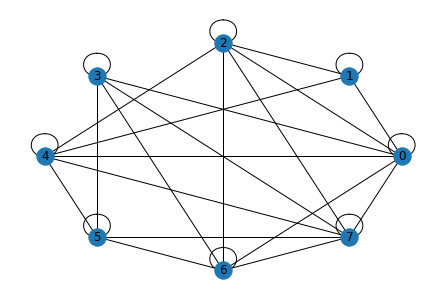

In [ ]:
nx.draw_circular(nx_graph,with_labels=True)

In [ ]:
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))
print('Banyaknya node {}'.format(nx_graph.number_of_nodes()))

Banyaknya sisi 27
Banyaknya node 8


In [ ]:
import scipy
A=scipy.sparse.csr_matrix.toarray(normal_matrix)

In [ ]:
cv_matrix

<8x116 sparse matrix of type '<class 'numpy.int64'>'
	with 162 stored elements in Compressed Sparse Row format>

In [ ]:
print(sentences_list[1])

Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.


In [ ]:
ranks = nx.pagerank(nx_graph)
for i in ranks:
    print(i, ranks[i])

0 0.13116781831094287
1 0.12951793040181
2 0.11886055287258798
3 0.12795815367758823
4 0.12007346381249615
5 0.13583713031500844
6 0.12022649645096849
7 0.1163584541585979


In [ ]:
ranked_sentences = sorted(((ranks[i],s) for i,s in enumerate(sentences_list)), reverse=True)
ranked_sentences

[(0.13583713031500844,
  'Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan \nberencana dan  Obstruction of Justice  (OJ) .'),
 (0.13116781831094287,
  'Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . \nLiputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal \npersidangan untuk  Ferdy Sambo  Cs.'),
 (0.12951793040181,
  'Sidang pidana umum ini diketahui terkait dengan \nkematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.'),
 (0.12795815367758823,
  'Baik \nkasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).'),
 (0.12022649645096849,
  'Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri \nCandrawathi, Bripka Ricky Rizal, Bharada Richard Elieze dan Kuat Ma’ruf.'),
 (0.12007346381249615,
  'Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas \nkematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu

In [ ]:
# Extract top 10 sentences as the summary
for i in range(7):
  print(i)
  print(ranked_sentences[i][1])

0
Dari belasan orang tersebut, dibagi menjadi dua kluster yakni pembunuhan 
berencana dan  Obstruction of Justice  (OJ) .
1
Ini Jadwal Sidang Ferdy Sambo Cs Terkait Kasus Kematian Brigadir J . 
Liputan6.com, Jakarta - Pengadilan Negeri Jakarta Selatan (PN Jaksel) telah mengatur jadwal 
persidangan untuk  Ferdy Sambo  Cs.
2
Sidang pidana umum ini diketahui terkait dengan 
kematian  Brigadir J  alias Nofryansyah Yoshua Hutabarat.
3
Baik 
kasus  pembunuhan berencana  maupun  Obstruction of Justice  (OJ).
4
Mereka yang masuk dalam kluster pembunuhan berencana yakni Ferdy Sambo, Putri 
Candrawathi, Bripka Ricky Rizal, Bharada Richard Elieze dan Kuat Ma’ruf.
5
Diketahui, Penyidik Bareskrim Polri telah menye rahkan sebanyak 11 orang tersangka atas 
kematian Brigadir J alias Nofryansyah Yoshua Hutabarat, ke Kejaksaan Agung, pada Rabu 5 
Oktober 2022.
6
Humas Pengadilan Negeri Jakarta Selatan Djumyanto mengatakan, untuk sidang terha dap 
para tersangka ini nantinya dilakukan dengan waktu yang b